In [1]:
import sklearn
print(sklearn.__version__)

0.20.2


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
data = np.loadtxt('curve80.txt')
X = data[:,0]
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it's 2-di mensional
Y = data[:,1]
Xtr,Xte,Ytr,Yte = train_test_split(X, Y,test_size=0.25,shuffle=False) # requires sklearn v > = 0.19

In [4]:
xx = np.ones(2)
print('xx:', xx)
XX = np.atleast_2d(xx)
print('XX:', XX)
XX = XX.T
print('after transpose XX:', XX)

xx: [1. 1.]
XX: [[1. 1.]]
after transpose XX: [[1.]
 [1.]]


# Problem 1 : Linear Regression

## Part 1

In [5]:
print("The shapes of four features is:")
print(Xtr.shape, Xte.shape, Ytr.shape, Yte.shape)

The shapes of four features is:
(60, 1) (20, 1) (60,) (20,)


In [6]:
print(Xtr[:5], Ytr[:5])

[[3.4447005]
 [4.7580645]
 [6.4170507]
 [5.7949309]
 [7.7304147]] [-0.88011696  0.46491228  3.7397661   3.0087719   2.9210526 ]


In [7]:
print(Xte[:5], Yte[:5])

[[8.4907834 ]
 [7.4078341 ]
 [0.81797235]
 [0.72580645]
 [7.5921659 ]] [ 2.3070175   3.7982456  -0.99707602 -0.47076023  4.1491228 ]


## Part 2

In [8]:
lr = LinearRegression().fit(Xtr, Ytr) # fit the model
xs = np.linspace(0,10,200) # densely sample possible x-values
xs = xs[:,np.newaxis]  # force "xs" to be an Mx1 matrix (expected by our code)
ys = lr.predict(xs)  # make predictions at xs

In [9]:
xss = np.linspace(0,1,4)
print('xss: ', xss)
xss_2d= xss[:,np.newaxis]
print('xss_2d: ', xss_2d)

xss:  [0.         0.33333333 0.66666667 1.        ]
xss_2d:  [[0.        ]
 [0.33333333]
 [0.66666667]
 [1.        ]]


(a) Plot the training data, test data, and prediction function in a single plot.

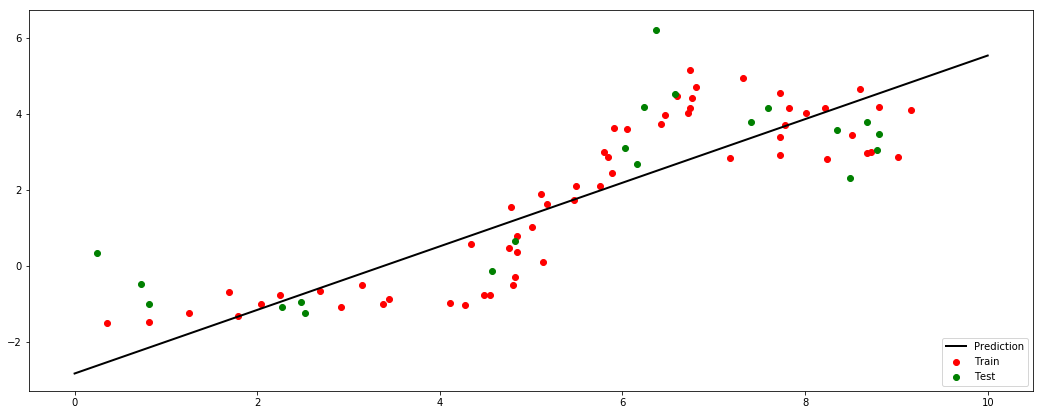

In [10]:
plt.rcParams['figure.figsize'] = (18.0, 7.0) # axis-limit, use it later also
lines = plt.plot(xs, ys, color ='black', linewidth = 2,label = 'Prediction') # xs/xtr/xte vs. ys/ytr/yte with different colors 
plt.scatter(Xtr, Ytr, c = 'r', label = "Train" )
plt.scatter(Xte, Yte, c = 'g', label = "Test" )
plt.legend(loc =4) # add legend for each color
#plt.figimage(im, 5, 5, zorder=1, alpha=0.3) # Skip this in HW2, it is pr int the background image

(b) Print the linear regression intercept and coefficient. As expected from the plot, the intercept is just below -2, and the slope is positive.

In [11]:
slope = (np.mean(ys) - lr.intercept_)/ np.mean(xs)
print(lr.intercept_, slope)

-2.82765048766481 0.8360691602619531


(c) Compute the mean squared error of the predictions on the training and test data.

In [12]:
# Make predictions
Ytr_pred = lr.predict(Xtr) # make y predictions using fitted model 
Yte_pred = lr.predict(Xte)
# Compute mean squared error
def mse(y_pred, y): 
    return np.mean((y_pred-y)**2)
print('Train MSE:', mse(Ytr_pred, Ytr))
print('Test MSE:', mse(Yte_pred, Yte))

Train MSE: 1.1277119556093909
Test MSE: 2.2423492030101237


## Part 3

In [13]:
Xtr2 = np.zeros( (Xtr.shape[0],2) ) # create Mx2 array to store features 
Xtr2[:,0] = Xtr[:,0] # place original "x" feature as X1
Xtr2[:,1] = Xtr[:,0]**2 # place "x^2" feature as X2

In [14]:
demox = np.arange(4).reshape(4,1)
print('demox:', demox)

# y = x + x^2
poly2 = PolynomialFeatures(2, include_bias=False).fit(Xtr) 
demoxx = poly2.transform(demox)
print('degree 2 - demoxx:', demoxx)

# y = 1 + x + x^2 + x^3
poly3 = PolynomialFeatures(3, include_bias=True).fit(Xtr) 
demoxxx = poly3.transform(demox)
print('degree 3 - demoxxx:', demoxxx)

demox: [[0]
 [1]
 [2]
 [3]]
degree 2 - demoxx: [[0. 0.]
 [1. 1.]
 [2. 4.]
 [3. 9.]]
degree 3 - demoxxx: [[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]]


In [15]:
poly = PolynomialFeatures(2, include_bias=False).fit(Xtr) 
Xtr2 = poly.transform(Xtr)

(a) Fit polynomial regression models of degree , then plot the learned prediction functions.

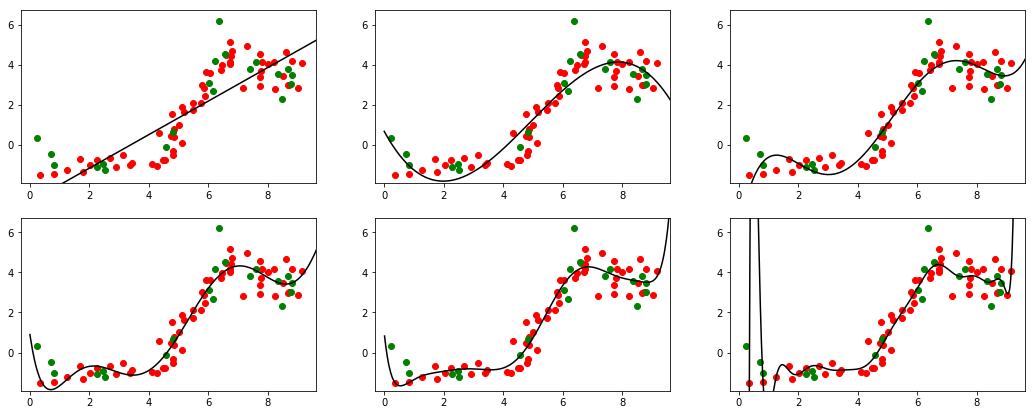

In [16]:
degrees = [1, 3, 5, 7, 10, 18]

# Plot settings
plt.rcParams['figure.figsize'] = (18.0, 7.0)
fig, ax = plt.subplots(2,3)
axFlat = [a for row in ax for a in row] # 2x3 subplots as simple list

err_train = []
err_test = []
for i, d in enumerate(degrees):
    # Create polynomial features
    poly = PolynomialFeatures(d, include_bias=False).fit(Xtr) 
    XtrP = poly.transform(Xtr)
    XteP = poly.transform(Xte)
    
    # Scale features to standard distribution (mean 0, variance 1)
    scaler = StandardScaler().fit(XtrP)
    XtrP = scaler.transform(XtrP)
    XteP = scaler.transform(XteP)
    # Fit the model
    lrP = LinearRegression().fit(XtrP, Ytr)
    
    # Plot the prediction function
    xsP = np.sort(np.random.uniform(0.0, X.max()+1, (1000,1)), axis =0)
    ysP = lrP.predict(scaler.transform(poly.transform(xsP)))
    
    axFlat[i].scatter(Xtr, Ytr, c = 'r')
    axFlat[i].scatter(Xte, Yte, c = 'g')
    axisSize = axFlat[i].axis()
    axFlat[i].plot(xsP, ysP, color = 'black') # plot the fitted curve 
    axFlat[i].axis(axisSize)
    
    # Make predictions
    YtrP_pred = lrP.predict(XtrP)
    YteP_pred = lrP.predict(XteP)
    # Save train and test errors for (b)
    err_train.append(mse(YtrP_pred,Ytr))
    err_test.append(mse(YteP_pred, Yte))
    

(b)Plot the training and test errors on a log scale (using pyplot.semilogy) as a function of the model degree.

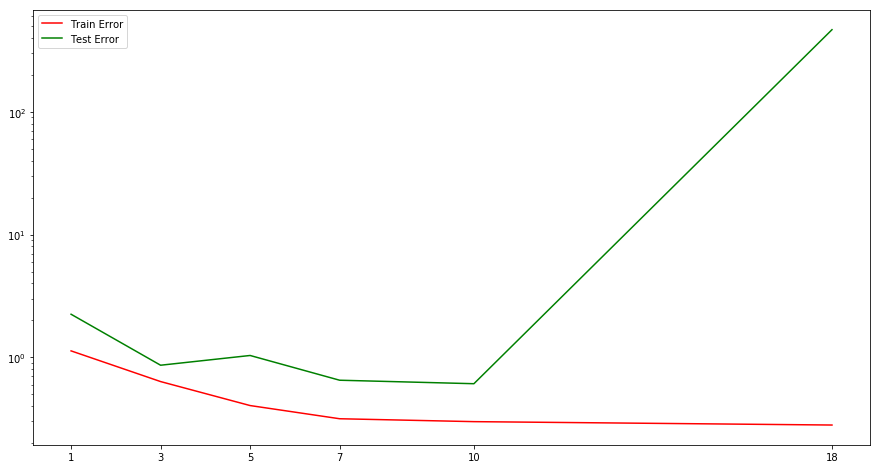

In [17]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)
# plot degrees vs. err_train and degrees vs. err_test on the same plot
plt.semilogy(degrees,err_train,c='r', label = "Train Error")
plt.semilogy(degrees,err_test, c='g', label = "Test Error")
plt.xticks([1,3,5,7,10,18])
plt.legend(loc = 0)

(c) From this plot, degree 10 has the lowest test error based on this experiment. 

# Problem 2: Cross-validation

## Part 1

Define a function that takes the degree and number of folds as arguments, and returns the cross-validation error.

In [21]:
def run_cv(d, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=False) 
    err_cv = []
    for train_idx, test_idx in kf.split(Xtr, Ytr):
        Xtr_cv, Xte_cv = Xtr[train_idx], Xtr[test_idx]
        Ytr_cv, Yte_cv = Ytr[train_idx], Ytr[test_idx]
        # Create polynomial features
        poly = PolynomialFeatures(d, include_bias = False).fit(Xtr_cv)
        Xtr_cvP = poly.transform(Xtr_cv)
        Xte_cvP = poly.transform(Xte_cv)
        
        # Scale features to standard distribution (mean 0, variance 1)
        scaler = StandardScaler().fit(Xtr_cvP)
        Xtr_cvP = scaler.transform(Xtr_cvP)
        Xte_cvP = scaler.transform(Xte_cvP)
        # Fit the model
        lrP = LinearRegression().fit(Xtr_cvP, Ytr_cv)
        
        # Make predictions on the test fold
        Yte_cvP_pred = lrP.predict(Xte_cvP)
        
        # Return MSE on the test fold
        err_cv.append(mse(Yte_cvP_pred, Yte_cv)) 
    return np.mean(err_cv)
n_folds = 5
err_cv = []
for d in degrees:
    err_cv.append(run_cv(d, n_folds))

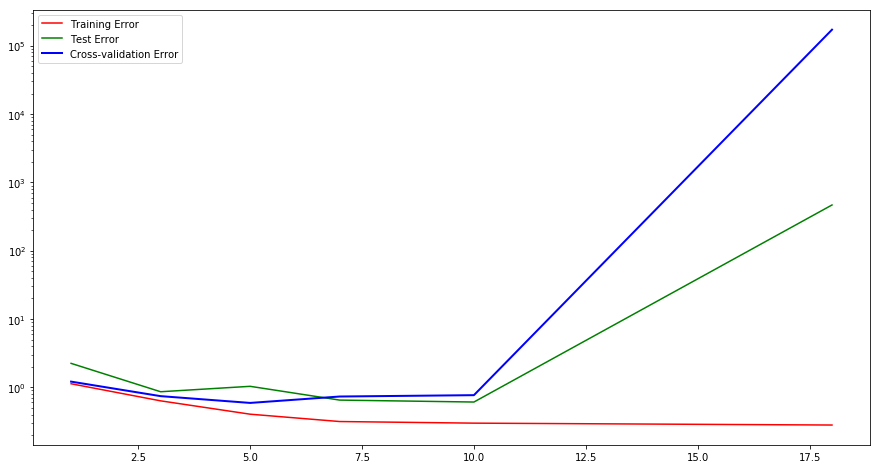

In [25]:
plt.rcParams['figure.figsize'] = (15.0, 8.0) 
plt.semilogy(degrees, err_train, c = 'r', label = "Training Error")
plt.semilogy(degrees, err_test, c = 'g', label = "Test Error")
plt.semilogy(degrees, err_cv, c = 'b', linewidth=2, label = "Cross-validation Error")
plt.legend(loc = 0)

## Part 2 

Initially, the resulting plot shows a similar graph comparing to the function of the model degree to the validation data used in the previous problem. A difference between cross-validation and MSE evaluated is that in higher degrees (after 10) the test error begin to grow slower than cross-validation.  

If you like, you can also plot a learning curve to see how performance is changing for these degrees as a function of the number of training data.

## Part 3

## Part 4

In [27]:
d = degrees[np.argmin(err_cv)] 
folds = [2, 3, 4, 5, 6, 10, 12, 15] 
err_cv_folds = []
for k in folds:
    err_cv_folds.append(run_cv(d,k))

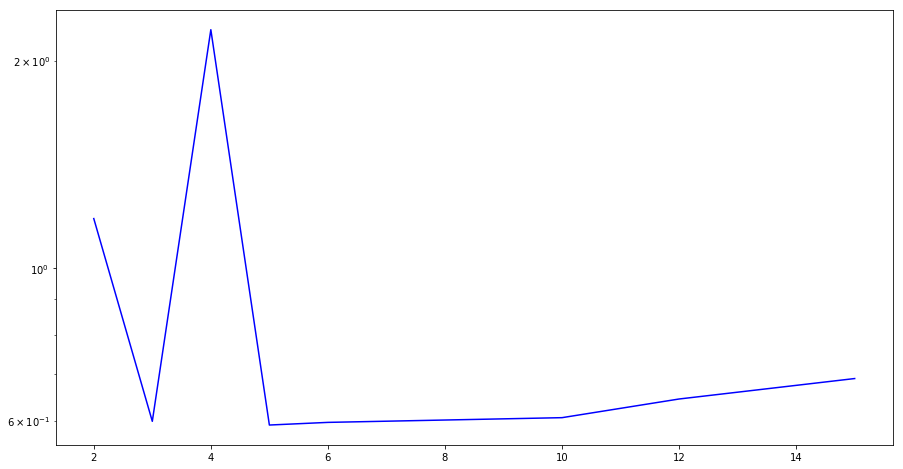

In [28]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.semilogy(folds, err_cv_folds, c= 'b')

This graph shows some high errors occurs in some folds when the number of the folds are low. But when the number of folds increase, the error becomes low. Because when we increase the folds, the trainging data will increase too. Therefore, the error will become low when trainging data gets more.

# Problem 3

## Problem 3 is shown in PDF

# Problem 4

For the homework 2, I followed the steps by steps from discussion. And also, I discussed with Jiaxiang Wang and Wanjing Zhang about some confusions. On Problem 3, I search some definitions which are Magalanobis distance and density formula etc.